<a href="https://colab.research.google.com/github/mauro2082/yol/blob/main/yolo5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os  # esta libreria nos permite trabajar con archivos, carpetas, directorios

In [3]:
import glob # esta libreria nos permite buscar en los archivos, carpetas, directorios

In [4]:
from IPython.display import Image # esta libreria nos permite visualizar imagenes

In [5]:
from IPython import display # esta libreria nos permite visualizar imagenes

In [6]:
display.clear_output(wait=True) # esta libreria nos permite limpiar la salida de la celda

In [7]:
!nvidia-smi

Wed Mar 19 15:28:32 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   36C    P8             11W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [8]:
HOME = os.getcwd()
print(HOME)

/content


In [9]:
!pip install ultralytics

In [10]:
import ultralytics # verificar libreria
ultralytics.checks() # verificar libr

Ultralytics 8.3.93 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.2/112.6 GB disk)


In [11]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets


mkdir: cannot create directory ‘/content/datasets’: File exists
/content/datasets


In [19]:
!rm -rf /content/datasets/-safety-helmet-V2-1/

%cd {HOME}/datasets


shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
/content/datasets


In [20]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="or9fJpqV2p5sYP0BQ7Di")
project = rf.workspace("safety-helmet-brfly").project("safety-helmet-v2")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to -safety-helmet-V2-1 in yolov8:: 100%|██████████| 3058/3058 [00:00<00:00, 4267.78it/s]


In [21]:
%cd {HOME}

/content


In [22]:
%cd {dataset.location}

/content/datasets/-safety-helmet-V2-1


In [23]:
!yolo task=detect mode=train model=yolov5m.pt data=/content/datasets/-safety-helmet-V2-1/data.yaml epochs=120 imgsz=640 batch=16 lr0=0.001 cos_lr=True

PRO TIP 💡 Replace 'model=yolov5m.pt' with new 'model=yolov5mu.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.

100% 48.2M/48.2M [00:00<00:00, 101MB/s] 
Ultralytics 8.3.93 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov5m.pt, data=/content/datasets/-safety-helmet-V2-1/data.yaml, epochs=120, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, 

In [24]:
from google.colab import files
files.download('/content/datasets/-safety-helmet-V2-1/runs/detect/train/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [26]:
!ls /content/datasets/-safety-helmet-V2-1/runs/detect/train

args.yaml					    R_curve.png		 val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		 val_batch0_pred.jpg
confusion_matrix.png				    results.png		 val_batch1_labels.jpg
events.out.tfevents.1742398560.0bc331e94d06.4172.0  train_batch0.jpg	 val_batch1_pred.jpg
F1_curve.png					    train_batch1.jpg	 val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch2.jpg	 val_batch2_pred.jpg
labels.jpg					    train_batch8470.jpg  weights
P_curve.png					    train_batch8471.jpg
PR_curve.png					    train_batch8472.jpg


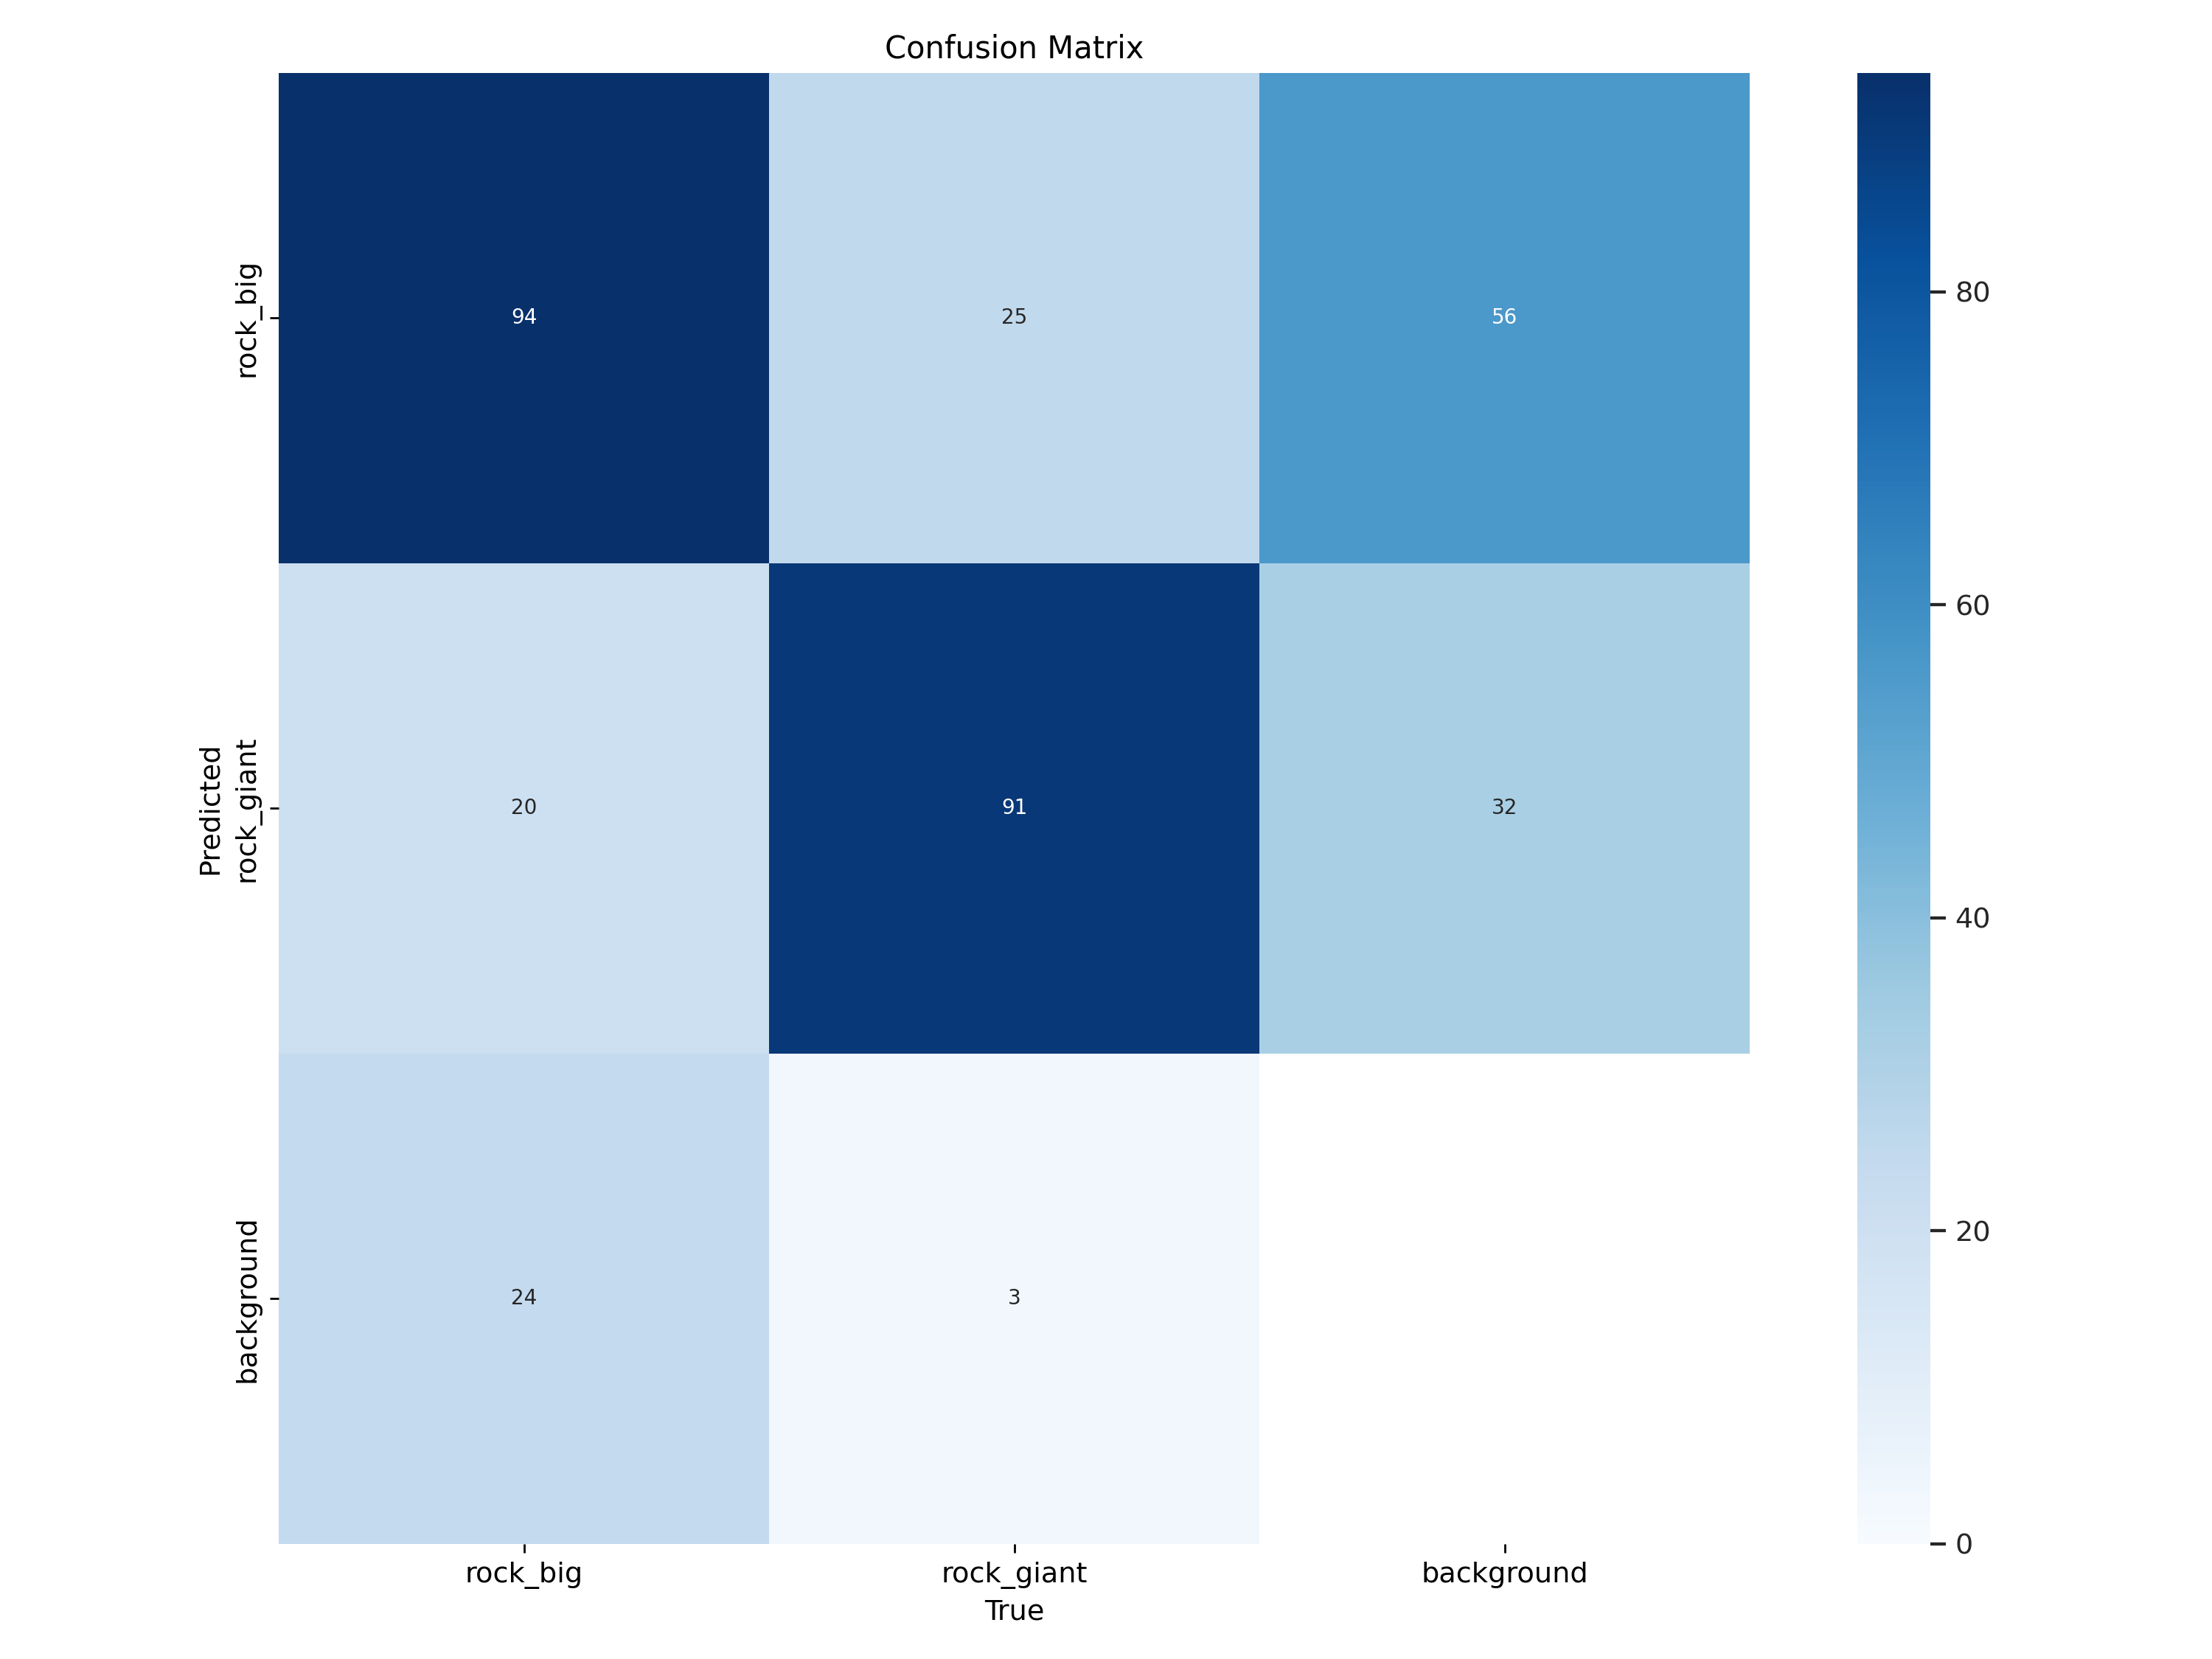

In [27]:
from IPython.display import Image

Image(filename='/content/datasets/-safety-helmet-V2-1/runs/detect/train/confusion_matrix.png', width=900)

/content


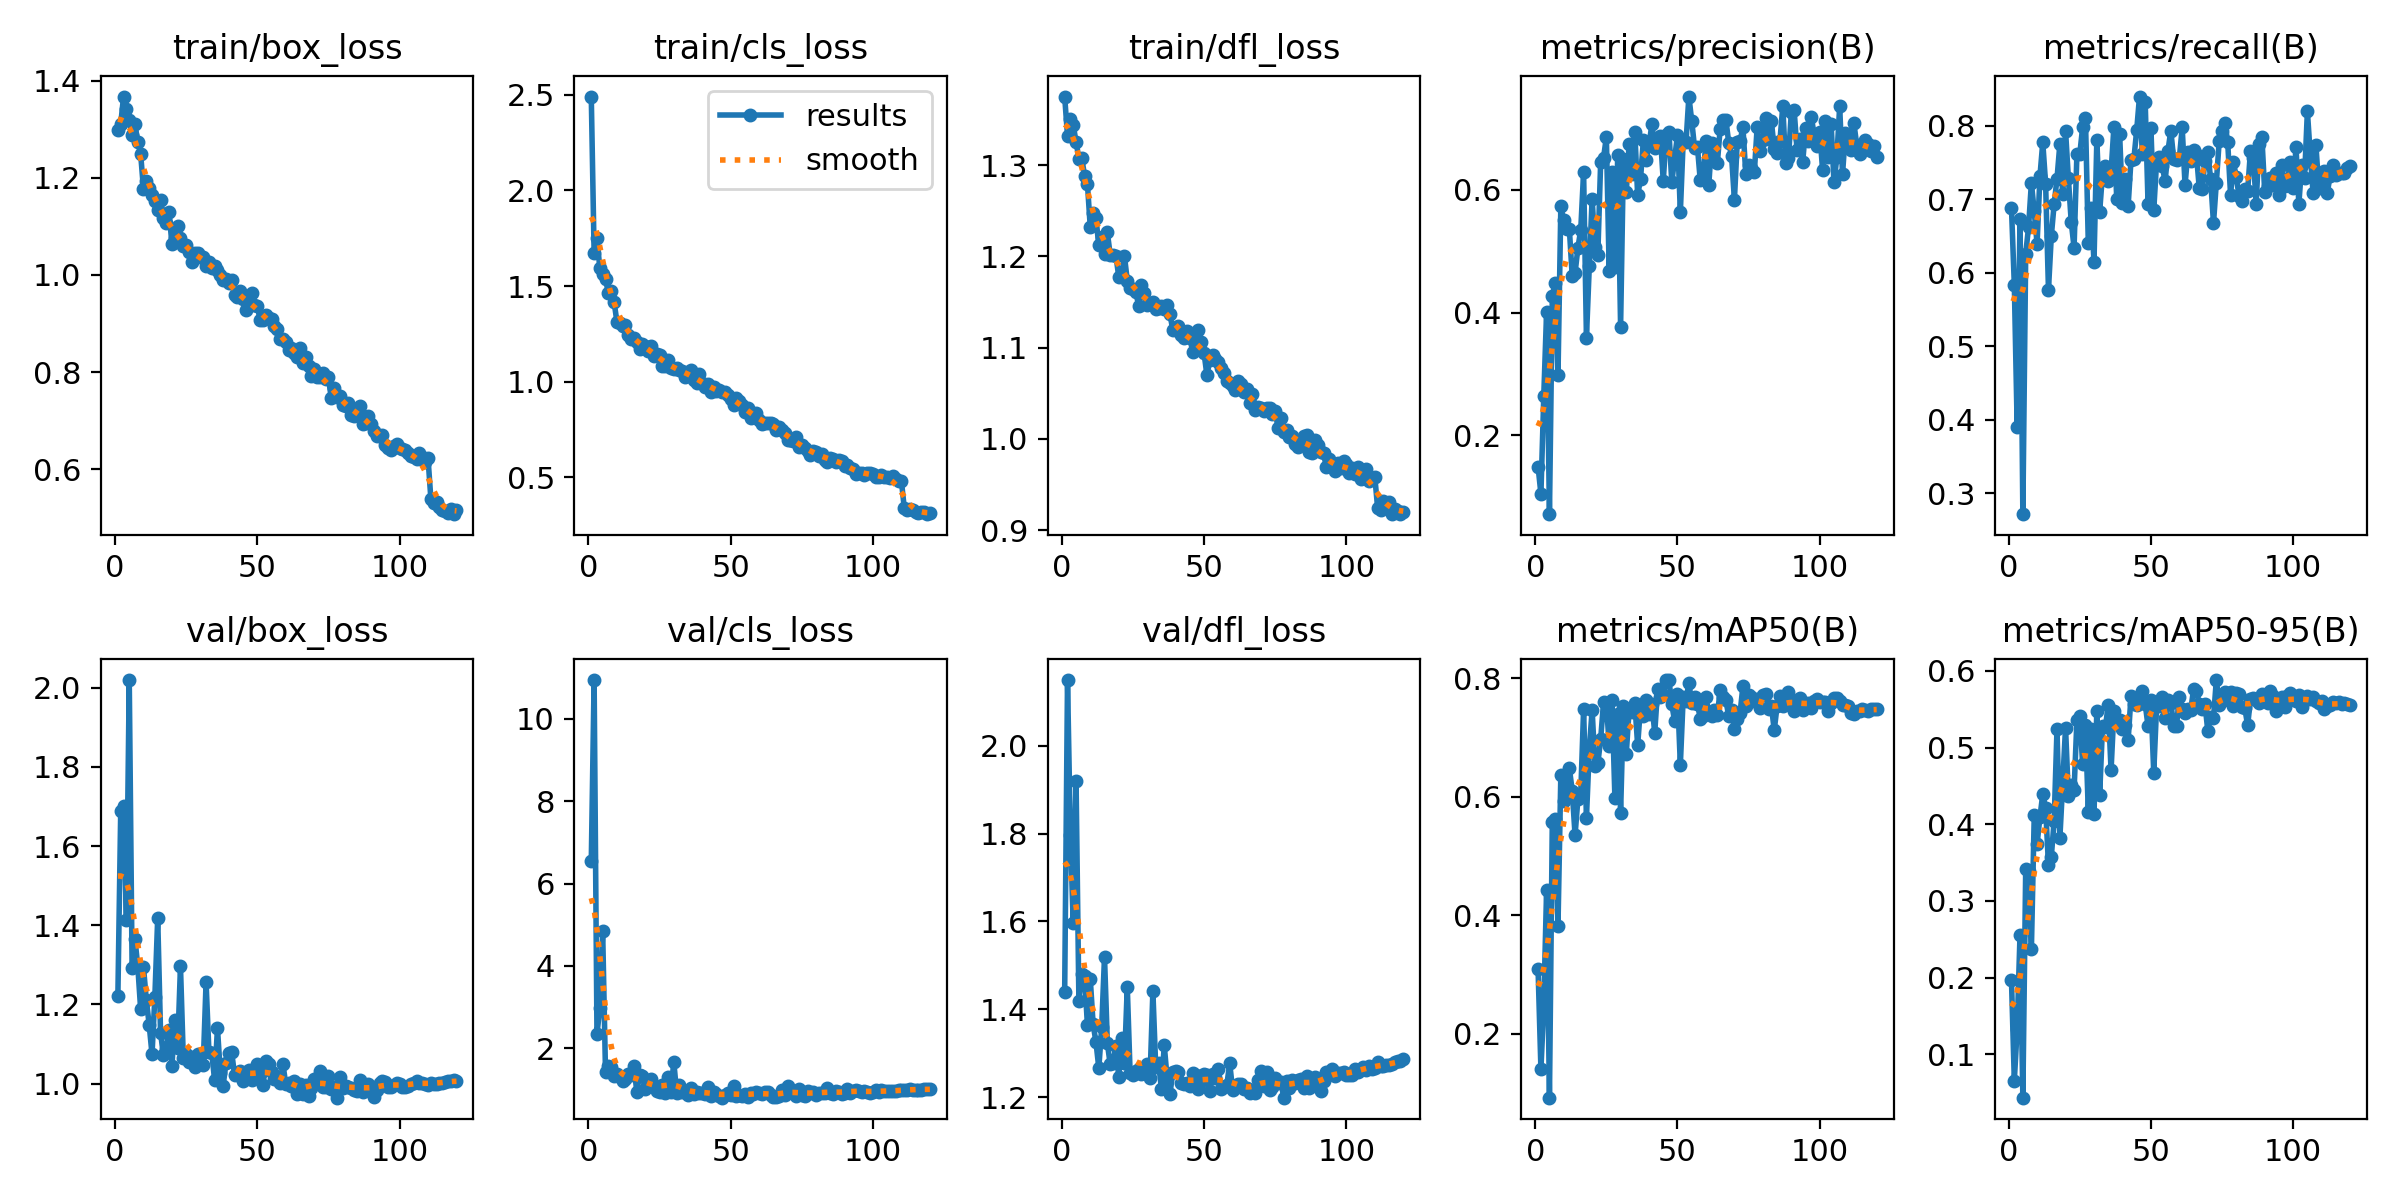

In [28]:
%cd {HOME}
from IPython.display import Image
Image(filename='/content/datasets/-safety-helmet-V2-1/runs/detect/train/results.png',width=600)

/content


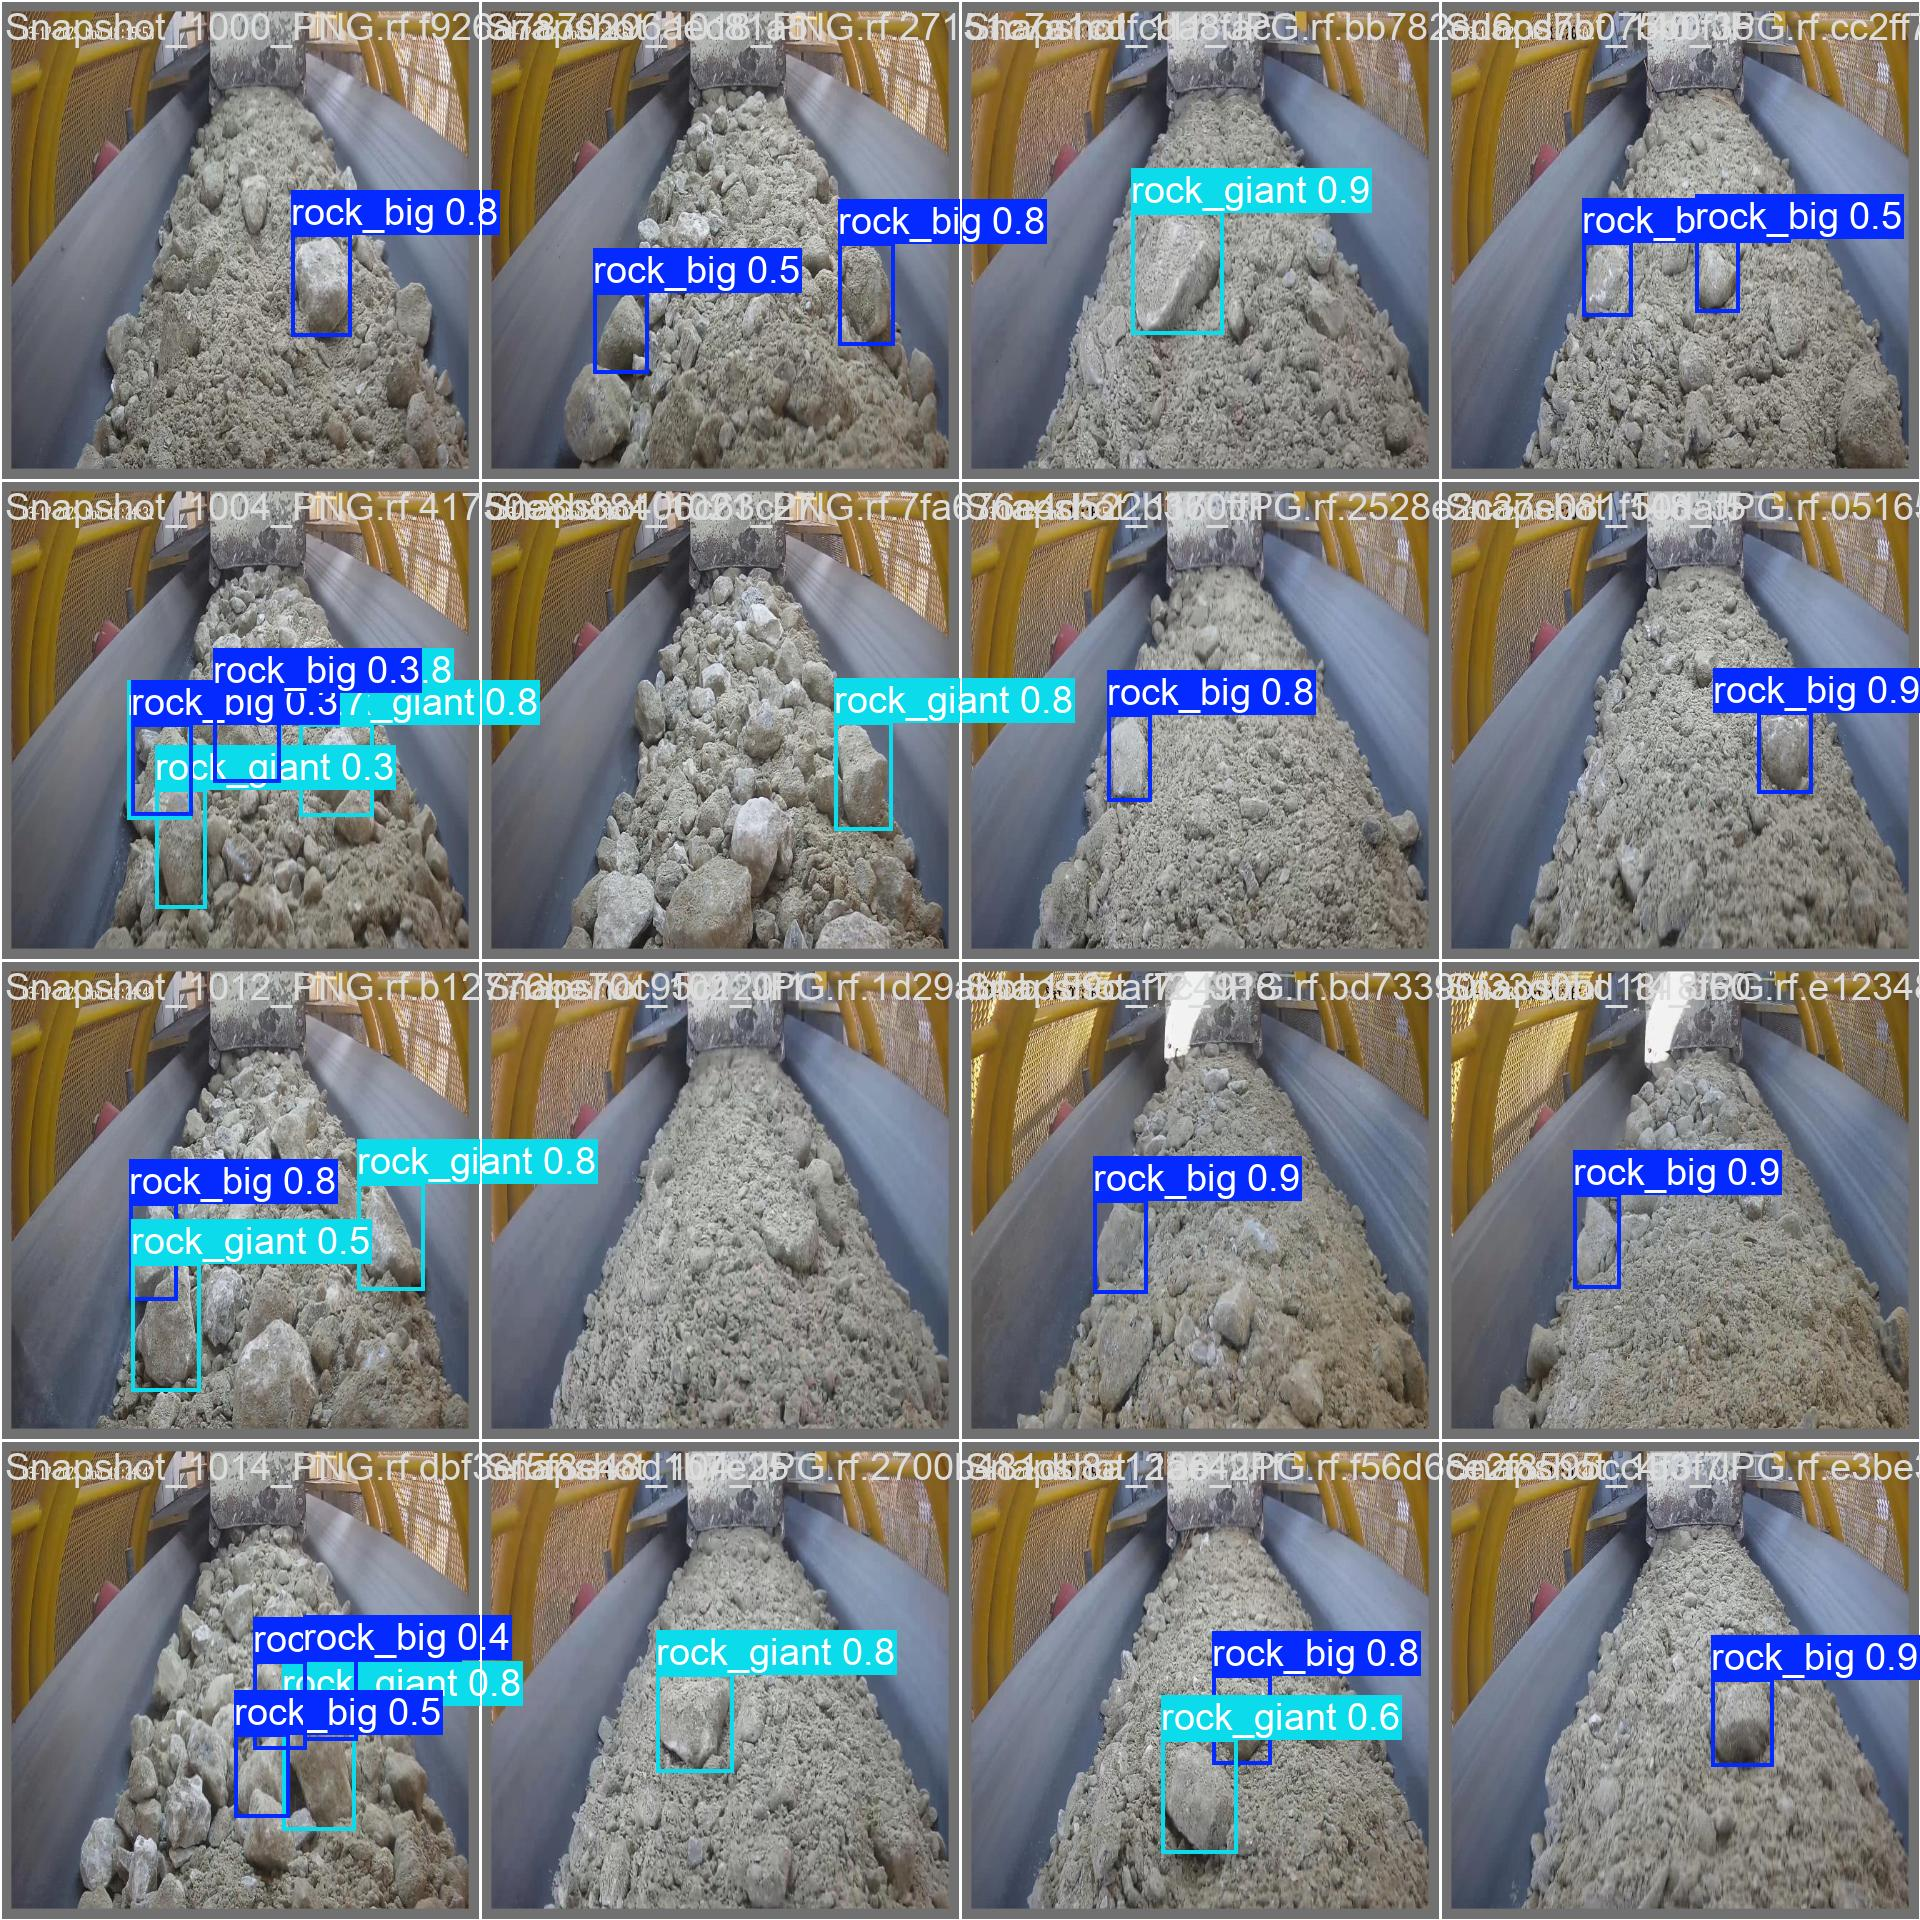

In [29]:
%cd {HOME}
from IPython.display import Image
Image(filename='/content/datasets/-safety-helmet-V2-1/runs/detect/train/val_batch0_pred.jpg',width=600)

In [30]:
%cd {HOME}

!yolo task=detect mode=val model=/content/datasets/-safety-helmet-V2-1/runs/detect/train/weights/best.pt data=/content/datasets/-safety-helmet-V2-1/data.yaml

/content
Ultralytics 8.3.93 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv5m summary (fused): 106 layers, 25,046,374 parameters, 0 gradients, 64.0 GFLOPs
val: Scanning /content/datasets/-safety-helmet-V2-1/valid/labels.cache... 200 images, 25 backgrounds, 0 corrupt: 100% 200/200 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 13/13 [00:06<00:00,  1.87it/s]
                   all        200        257      0.702      0.723      0.788      0.589
              rock_big        106        138      0.628       0.63      0.721       0.52
            rock_giant         97        119      0.776      0.815      0.856      0.658
Speed: 4.0ms preprocess, 18.4ms inference, 0.0ms loss, 2.7ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [31]:

%cd {HOME}

!yolo task=detect mode=predict model=/content/datasets/-safety-helmet-V2-1/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics 8.3.93 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv5m summary (fused): 106 layers, 25,046,374 parameters, 0 gradients, 64.0 GFLOPs

image 1/99 /content/datasets/-safety-helmet-V2-1/test/images/Snapshot_100_JPG.rf.418fa71a65d8eec46b8fd5ad5a93dac5.jpg: 640x640 1 rock_giant, 32.8ms
image 2/99 /content/datasets/-safety-helmet-V2-1/test/images/Snapshot_1011_PNG.rf.433b4908147999df65de8f394044928b.jpg: 640x640 5 rock_bigs, 32.9ms
image 3/99 /content/datasets/-safety-helmet-V2-1/test/images/Snapshot_1015_PNG.rf.1a00702de172bca600b97e2eb15886ed.jpg: 640x640 3 rock_bigs, 32.8ms
image 4/99 /content/datasets/-safety-helmet-V2-1/test/images/Snapshot_101_JPG.rf.862e35b93e9d18ab444a82dc9f2cbdaa.jpg: 640x640 1 rock_giant, 32.8ms
image 5/99 /content/datasets/-safety-helmet-V2-1/test/images/Snapshot_109_JPG.rf.5b65792da2997e3d42e51cc75f70292c.jpg: 640x640 1 rock_big, 27.2ms
image 6/99 /content/datasets/-safety-helmet-V2-1/test/images/Snapshot_114_JPG.rf.2b7f

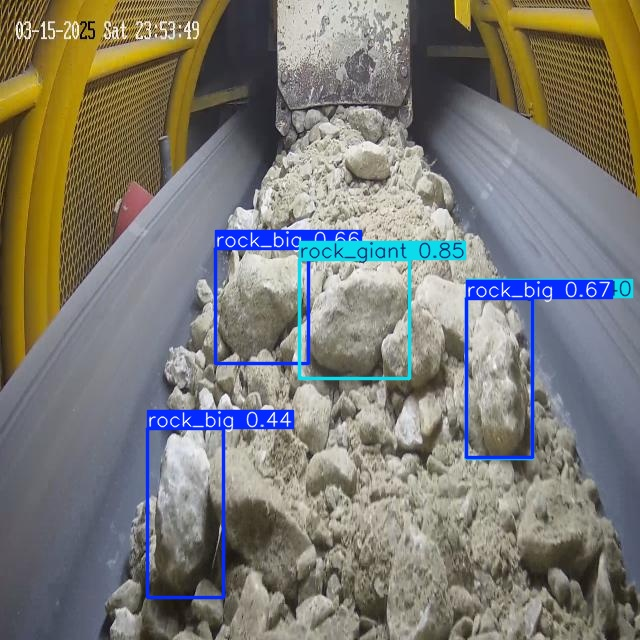

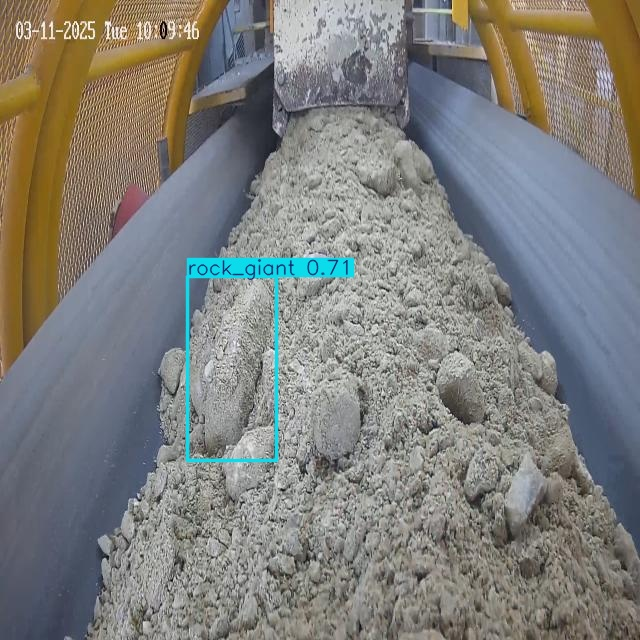

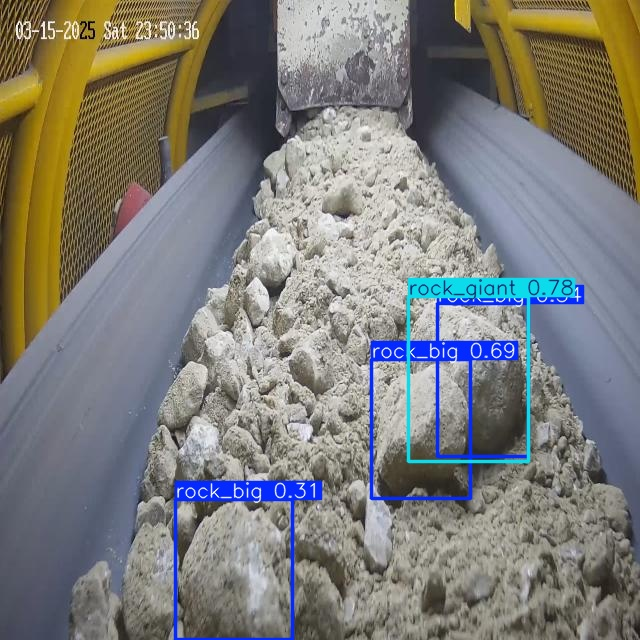

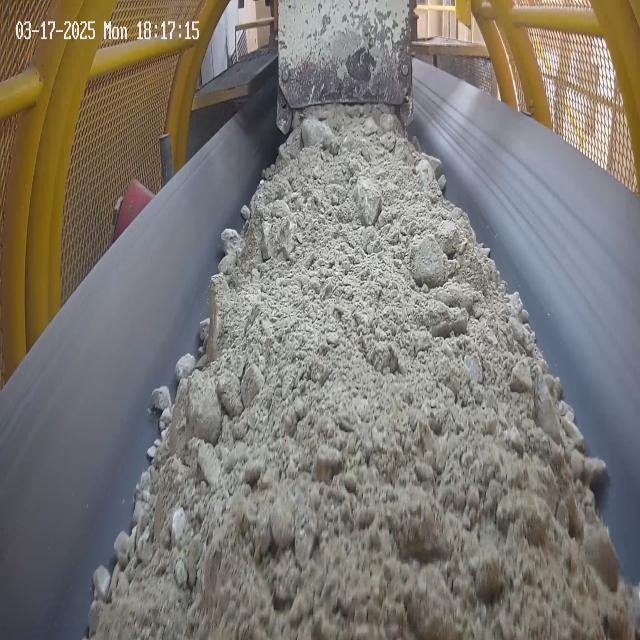

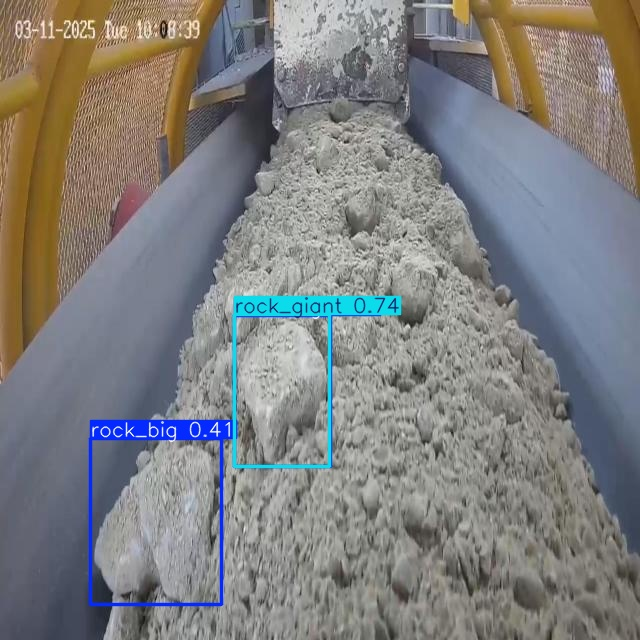

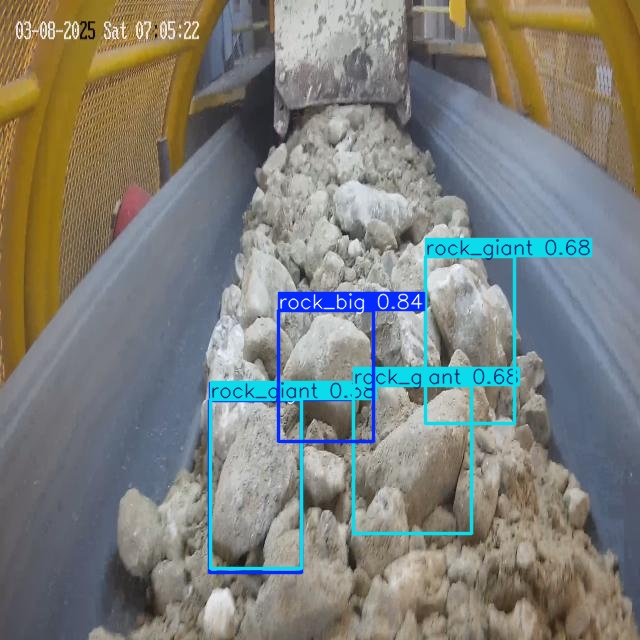

In [32]:
for image_path in glob.glob('//content/runs/detect/predict/*.jpg')[:6]:
  display.display(Image(filename=image_path,width=600))
  print("\n")